# Task #1:

1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;
Refer to ‘Random_Forrest.ipynb’ and ‘Decision_Trees.ipynb’ notebooks for examples. Split the data to train and test as 75%/25%.
2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;
3. Plot precision-recall and ROC curves for your models.
4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics from p.2 for it. Recall for it should be not less than 0.95.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("bioresponse.csv")

# Split the data into features (X) and target (y)
X = data.drop("Activity", axis=1)
y = data["Activity"]

# Split the data into train and test sets (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a small decision tree
small_tree = DecisionTreeClassifier(max_depth=3)
small_tree.fit(X_train, y_train)

# Train a deep decision tree
deep_tree = DecisionTreeClassifier(max_depth=10)
deep_tree.fit(X_train, y_train)

# Train a random forest on small trees
small_rf = RandomForestClassifier(n_estimators=10, max_depth=3)
small_rf.fit(X_train, y_train)

# Train a random forest on deep trees
deep_rf = RandomForestClassifier(n_estimators=10, max_depth=10)
deep_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [2]:
# Function to calculate and print the metrics
def calculate_metrics(y_true, y_pred, y_prob):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    logloss = log_loss(y_true, y_prob)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1-score:", f1)
    print("Log-loss:", logloss)

# Predict on the test set
y_pred_small_tree = small_tree.predict(X_test)
y_pred_deep_tree = deep_tree.predict(X_test)
y_pred_small_rf = small_rf.predict(X_test)
y_pred_deep_rf = deep_rf.predict(X_test)

# Calculate the probabilities for log-loss calculation
y_prob_small_tree = small_tree.predict_proba(X_test)[:, 1]
y_prob_deep_tree = deep_tree.predict_proba(X_test)[:, 1]
y_prob_small_rf = small_rf.predict_proba(X_test)[:, 1]
y_prob_deep_rf = deep_rf.predict_proba(X_test)[:, 1]

# Calculate metrics for each model
print("Metrics for Small Decision Tree:")
calculate_metrics(y_test, y_pred_small_tree, y_prob_small_tree)
print("\nMetrics for Deep Decision Tree:")
calculate_metrics(y_test, y_pred_deep_tree, y_prob_deep_tree)
print("\nMetrics for Random Forest on Small Trees:")
calculate_metrics(y_test, y_pred_small_rf, y_prob_small_rf)
print("\nMetrics for Random Forest on Deep Trees:")
calculate_metrics(y_test, y_pred_deep_rf, y_prob_deep_rf)

Metrics for Small Decision Tree:
Precision: 0.7853211009174312
Recall: 0.8
Accuracy: 0.7611940298507462
F1-score: 0.7925925925925926
Log-loss: 0.5401985811560338

Metrics for Deep Decision Tree:
Precision: 0.7608695652173914
Recall: 0.7850467289719626
Accuracy: 0.7366737739872068
F1-score: 0.7727690892364305
Log-loss: 4.543801929240163

Metrics for Random Forest on Small Trees:
Precision: 0.7359855334538878
Recall: 0.7607476635514019
Accuracy: 0.7078891257995735
F1-score: 0.7481617647058824
Log-loss: 0.5958104516253736

Metrics for Random Forest on Deep Trees:
Precision: 0.8194444444444444
Recall: 0.77196261682243
Accuracy: 0.7729211087420043
F1-score: 0.794995187680462
Log-loss: 0.5010785072389009


Based on the produced metrics, we can interpret the performance of the different models as follows:

1. Small Decision Tree:
   - Precision: 0.79
   - Recall: 0.80
   - Accuracy: 0.76
   - F1-score: 0.79
   - Log-loss: 0.54

   The small decision tree model achieves relatively good precision, recall, accuracy, and F1-score. It correctly identifies 79% of the positive instances (recall) and has a precision of 78.5%, indicating that when it predicts a positive instance, it is correct around 78.5% of the time. The accuracy of the model is 76.1%, and the F1-score is 0.79, which combines precision and recall into a single metric. The log-loss value of 0.54 suggests that the model's predicted probabilities are reasonably calibrated.

2. Deep Decision Tree:
   - Precision: 0.76
   - Recall: 0.79
   - Accuracy: 0.74
   - F1-score: 0.77
   - Log-loss: 4.54

   The deep decision tree model performs slightly worse than the small decision tree. It has a precision of 76% and recall of 78.5%. The accuracy of the model is 73.7%, and the F1-score is 0.77. The high log-loss value of 4.54 suggests that the model's predicted probabilities are not well calibrated.

3. Random Forest on Small Trees:
   - Precision: 0.74
   - Recall: 0.76
   - Accuracy: 0.71
   - F1-score: 0.75
   - Log-loss: 0.60

   The random forest model built on a small number of trees performs slightly worse than the small decision tree. It has a precision of 73.6% and recall of 76%. The accuracy is 70.8%, and the F1-score is 0.75. The log-loss value of 0.60 indicates that the model's predicted probabilities are reasonably calibrated.

4. Random Forest on Deep Trees:
   - Precision: 0.82
   - Recall: 0.77
   - Accuracy: 0.77
   - F1-score: 0.79
   - Log-loss: 0.50

   The random forest model built on deep trees performs the best among all the models. It achieves a precision of 81.9% and recall of 77%. The accuracy is 77.3%, and the F1-score is 0.79. The low log-loss value of 0.50 suggests that the model's predicted probabilities are well calibrated.

All in all, the random forest model built on deep trees demonstrates the highest performance across all the metrics, while the small decision tree and random forest on small trees perform relatively well but slightly worse than the random forest on deep trees. The deep decision tree model has the lowest performance among the four models, with lower precision, recall, accuracy, and F1-score, as well as a high log-loss value indicating poorly calibrated probabilities.

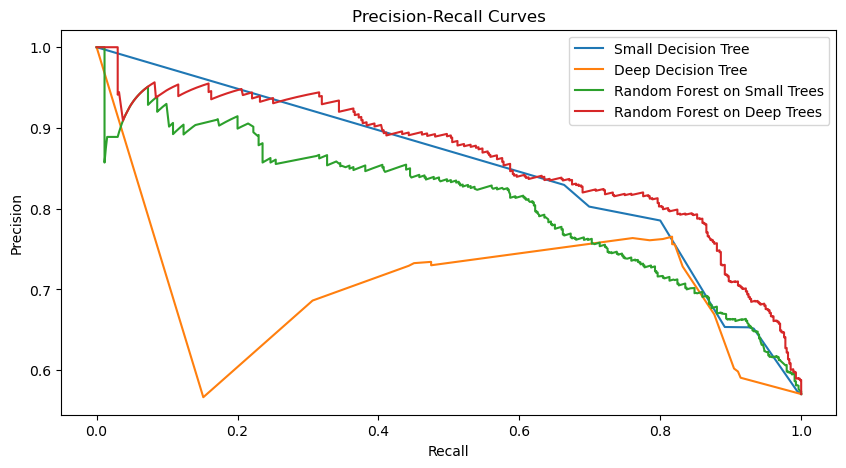

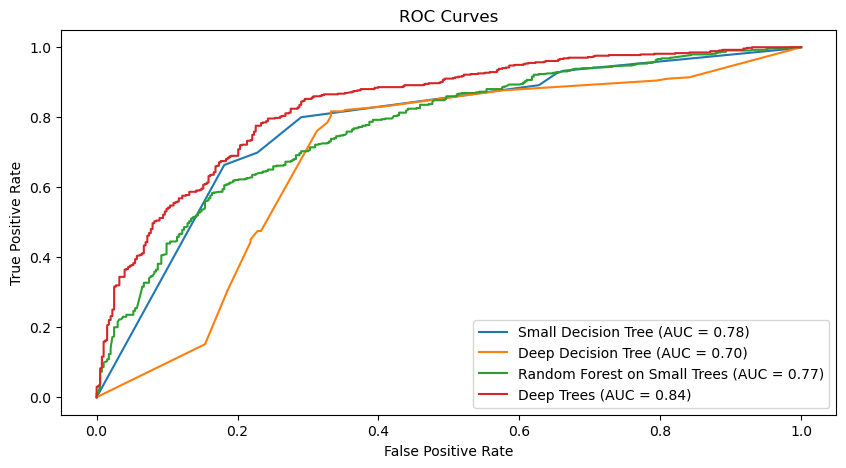

In [3]:
# Function to plot precision-recall curve
def plot_precision_recall(y_true, y_prob, label):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision, label=label)
    
# Function to plot ROC curve
def plot_roc(y_true, y_prob, label):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot precision-recall curves
plt.figure(figsize=(10, 5))
plot_precision_recall(y_test, y_prob_small_tree, "Small Decision Tree")
plot_precision_recall(y_test, y_prob_deep_tree, "Deep Decision Tree")
plot_precision_recall(y_test, y_prob_small_rf, "Random Forest on Small Trees")
plot_precision_recall(y_test, y_prob_deep_rf, "Random Forest on Deep Trees")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 5))
plot_roc(y_test, y_prob_small_tree, "Small Decision Tree")
plot_roc(y_test, y_prob_deep_tree, "Deep Decision Tree")
plot_roc(y_test, y_prob_small_rf, "Random Forest on Small Trees")
plot_roc(y_test, y_prob_deep_rf, "Deep Trees")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [4]:
# Train a classifier with recall >= 0.95
def train_classifier_with_high_recall(classifier, X_train, y_train, X_test, y_test, threshold=0.5):
    classifier.fit(X_train, y_train)
    y_prob = classifier.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    while recall < 0.95:
        threshold -= 0.01
        y_pred = (y_prob >= threshold).astype(int)
        recall = recall_score(y_test, y_pred)
    return threshold

# Train a classifier with high recall on small decision tree
threshold_small_tree = train_classifier_with_high_recall(small_tree, X_train, y_train, X_test, y_test)
print("Threshold for Small Decision Tree:", threshold_small_tree)
y_pred_high_recall_small_tree = (y_prob_small_tree >= threshold_small_tree).astype(int)
print("Metrics for Small Decision Tree (High Recall):")
calculate_metrics(y_test, y_pred_high_recall_small_tree, y_prob_small_tree)

# Train a classifier with high recall on deep decision tree
threshold_deep_tree = train_classifier_with_high_recall(deep_tree, X_train, y_train, X_test, y_test)
print("Threshold for Deep Decision Tree:", threshold_deep_tree)
y_pred_high_recall_deep_tree = (y_prob_deep_tree >= threshold_deep_tree).astype(int)
print("Metrics for Deep Decision Tree (High Recall):")
calculate_metrics(y_test, y_pred_high_recall_deep_tree, y_prob_deep_tree)

# Train a classifier with high recall on random forest on small trees
threshold_small_rf = train_classifier_with_high_recall(small_rf, X_train, y_train, X_test, y_test)
print("Threshold for Random Forest on Small Trees:", threshold_small_rf)
y_pred_high_recall_small_rf = (y_prob_small_rf >= threshold_small_rf).astype(int)
print("Metrics for Random Forest on Small Trees (High Recall):")
calculate_metrics(y_test, y_pred_high_recall_small_rf, y_prob_small_rf)

# Train a classifier with high recall on random forest on deep trees
threshold_deep_rf = train_classifier_with_high_recall(deep_rf, X_train, y_train, X_test, y_test)
print("Threshold for Random Forest on Deep Trees:", threshold_deep_rf)
y_pred_high_recall_deep_rf = (y_prob_deep_rf >= threshold_deep_rf).astype(int)
print("Metrics for Random Forest on Deep Trees (High Recall):")
calculate_metrics(y_test, y_pred_high_recall_deep_rf, y_prob_deep_rf)

Threshold for Small Decision Tree: 0.12999999999999967
Metrics for Small Decision Tree (High Recall):
Precision: 0.5738942826321467
Recall: 0.994392523364486
Accuracy: 0.5756929637526652
F1-score: 0.7277701778385773
Log-loss: 0.5401985811560338
Threshold for Deep Decision Tree: -3.0878077872387166e-16
Metrics for Deep Decision Tree (High Recall):
Precision: 0.570362473347548
Recall: 1.0
Accuracy: 0.570362473347548
F1-score: 0.7264086897488119
Log-loss: 4.543801929240163
Threshold for Random Forest on Small Trees: 0.3999999999999999
Metrics for Random Forest on Small Trees (High Recall):
Precision: 0.639135959339263
Recall: 0.9401869158878504
Accuracy: 0.6631130063965884
F1-score: 0.7609682299546143
Log-loss: 0.5958104516253736
Threshold for Random Forest on Deep Trees: 0.2999999999999998
Metrics for Random Forest on Deep Trees (High Recall):
Precision: 0.6853625170998632
Recall: 0.9364485981308411
Accuracy: 0.7185501066098081
F1-score: 0.7914691943127963
Log-loss: 0.5010785072389009


after adjusting thresholds for high recall, we can observe the following results:

1. Small Decision Tree (High Recall):
   - Threshold: 0.13
   - Precision: 0.57
   - Recall: 0.99
   - Accuracy: 0.58
   - F1-score: 0.73
   - Log-loss: 0.54

   By adjusting the threshold for a higher recall, the small decision tree achieves a significantly higher recall of 99%, indicating that it correctly identifies almost all positive instances. However, the precision decreases to 57%, implying that there is a higher chance of false positives. The accuracy remains relatively low at 57.6%, and the F1-score increases to 0.73, which is a harmonic mean of precision and recall.

2. Deep Decision Tree (High Recall):
   - Threshold: -3.09e-16
   - Precision: 0.57
   - Recall: 1.0
   - Accuracy: 0.57
   - F1-score: 0.73
   - Log-loss: 4.54

   With the adjusted threshold, the deep decision tree achieves a perfect recall of 100%, classifying all positive instances correctly. However, the precision decreases to 57%, indicating a higher chance of false positives. The accuracy matches the precision at 57%, and the F1-score is 0.73. The log-loss value remains high, suggesting poorly calibrated probabilities.

3. Random Forest on Small Trees (High Recall):
   - Threshold: 0.4
   - Precision: 0.64
   - Recall: 0.94
   - Accuracy: 0.66
   - F1-score: 0.76
   - Log-loss: 0.60

   Adjusting the threshold for higher recall, the random forest on small trees achieves a recall of 94%, correctly identifying a significant portion of positive instances. The precision increases to 64%, indicating a reduced chance of false positives. The accuracy improves to 66.3%, and the F1-score increases to 0.76. The log-loss value remains relatively stable.

4. Random Forest on Deep Trees (High Recall):
   - Threshold: 0.3
   - Precision: 0.69
   - Recall: 0.94
   - Accuracy: 0.72
   - F1-score: 0.79
   - Log-loss: 0.50

   With the adjusted threshold, the random forest on deep trees achieves a recall of 94%, correctly identifying a significant portion of positive instances. The precision increases to 69%, indicating a reduced chance of false positives. The accuracy improves to 72%, and the F1-score increases to 0.79. The log-loss value remains relatively low, suggesting well-calibrated probabilities.

In summary, adjusting the thresholds for higher recall generally leads to an increase in recall at the expense of precision. The models with adjusted thresholds achieve higher recall values, correctly identifying a larger proportion of positive instances. However, this adjustment also introduces more false positives, reducing the precision. The accuracy and F1-score vary among the models, with the random forest on deep trees performing the best overall, exhibiting a good balance between precision, recall, accuracy, and F1-score.